Class=-1: 156 49.682%
Class=+1: 158 50.318%


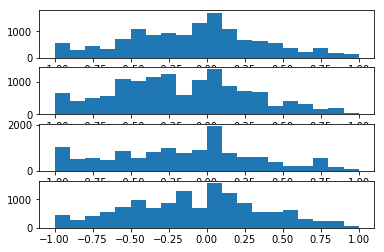

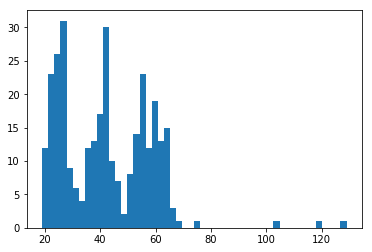

In [7]:
# summarize simple information about user movement data
from os import listdir
from numpy import array
from numpy import vstack
from pandas import read_csv
from matplotlib import pyplot
 
# return list of traces, and arrays for targets, groups and paths
def load_dataset(prefix=''):
    grps_dir, data_dir = prefix+'groups/', prefix+'dataset/'
    # load mapping files
    targets = read_csv(data_dir + 'MovementAAL_target.csv', header=0)
    groups = read_csv(grps_dir + 'MovementAAL_DatasetGroup.csv', header=0)
    paths = read_csv(grps_dir + 'MovementAAL_Paths.csv', header=0)
    # load traces
    sequences = list()
    target_mapping = None
    for name in listdir(data_dir):
        filename = data_dir + name
        if filename.endswith('_target.csv'):
            continue
        df = read_csv(filename, header=0)
        values = df.values
        sequences.append(values)
    return sequences, targets.values[:, 1], groups.values[:, 1], paths.values[:, 1]
 
# load dataset
sequences, targets, groups, paths = load_dataset('MovementAAL/')
# summarize class breakdown
class1,class2 = len(targets[targets==-1]), len(targets[targets==1])
print('Class=-1: %d %.3f%%' % (class1, class1/len(targets)*100))
print('Class=+1: %d %.3f%%' % (class2, class2/len(targets)*100))
# histogram for each anchor point
all_rows = vstack(sequences)
pyplot.figure()
variables = [0, 1, 2, 3]
for v in variables:
    pyplot.subplot(len(variables), 1, v+1)
    pyplot.hist(all_rows[:, v], bins=20)
pyplot.show()
# histogram for trace lengths
trace_lengths = [len(x) for x in sequences]
pyplot.hist(trace_lengths, bins=50)
pyplot.show()

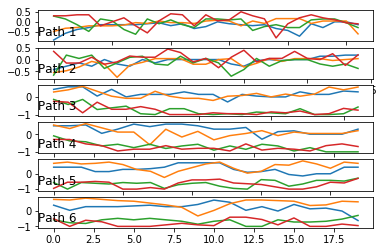

D:\Programmes\Developpement\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


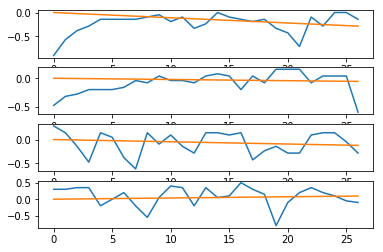

In [8]:
# plot series data
from os import listdir
from numpy import array
from numpy import vstack
from numpy.linalg import lstsq
from pandas import read_csv
from matplotlib import pyplot

# return list of traces, and arrays for targets, groups and paths
def load_dataset(prefix=''):
    grps_dir, data_dir = prefix+'groups/', prefix+'dataset/'
    # load mapping files
    targets = read_csv(data_dir + 'MovementAAL_target.csv', header=0)
    groups = read_csv(grps_dir + 'MovementAAL_DatasetGroup.csv', header=0)
    paths = read_csv(grps_dir + 'MovementAAL_Paths.csv', header=0)
    # load traces
    sequences = list()
    target_mapping = None
    for name in listdir(data_dir):
        filename = data_dir + name
        if filename.endswith('_target.csv'):
            continue
        df = read_csv(filename, header=0)
        values = df.values
        sequences.append(values)
    return sequences, targets.values[:,1], groups.values[:,1], paths.values[:,1]

# fit a linear regression function and return the predicted values for the series
def regress(y):
    # define input as the time step
    X = array([i for i in range(len(y))]).reshape(len(y), 1)
    # fit linear regression via least squares
    b = lstsq(X, y)[0][0]
    # predict trend on time step
    yhat = b * X[:,0]
    return yhat

# load dataset
sequences, targets, groups, paths = load_dataset('MovementAAL/')
# group sequences by paths
paths = [1,2,3,4,5,6]
seq_paths = dict()
for path in paths:
    seq_paths[path] = [sequences[j] for j in range(len(paths)) if paths[j]==path]
# plot one example of a trace for each path
pyplot.figure()
for i in paths:
    pyplot.subplot(len(paths), 1, i)
    # line plot each variable
    for j in [0, 1, 2, 3]:
        pyplot.plot(seq_paths[i][0][:, j], label='Anchor ' + str(j+1))
    pyplot.title('Path ' + str(i), y=0, loc='left')
pyplot.show()
# plot series for a single trace with trend
seq = sequences[0]
variables = [0, 1, 2, 3]
pyplot.figure()
for i in variables:
    pyplot.subplot(len(variables), 1, i+1)
    # plot the series
    pyplot.plot(seq[:,i])
    # plot the trend
    pyplot.plot(regress(seq[:,i]))
pyplot.show()

In [11]:
from os import listdir
from numpy import array
from numpy import savetxt
from pandas import read_csv
 
# return list of traces, and arrays for targets, groups and paths
def load_dataset(prefix=''):
    grps_dir, data_dir = prefix+'groups/', prefix+'dataset/'
    # load mapping files
    targets = read_csv(data_dir + 'MovementAAL_target.csv', header=0)
    groups = read_csv(grps_dir + 'MovementAAL_DatasetGroup.csv', header=0)
    paths = read_csv(grps_dir + 'MovementAAL_Paths.csv', header=0)
    # load traces
    sequences = list()
    target_mapping = None
    for name in listdir(data_dir):
        filename = data_dir + name
        if filename.endswith('_target.csv'):
            continue
        df = read_csv(filename, header=0)
        values = df.values
        sequences.append(values)
    return sequences, targets.values[:,1], groups.values[:,1], paths.values[:,1]
 
# create a fixed 1d vector for each trace with output variable
def create_dataset(sequences, targets):
    # create the transformed dataset
    transformed = list()
    n_vars, n_steps, max_length = 4, 25, 200
    # process each trace in turn
    for i in range(len(sequences)):
        seq = sequences[i]
        # pad sequences
        seq = pad(seq, ((max_length-len(seq),0),(0,0)), 'constant', constant_values=(0.0))
        vector = list()
        # last n observations
        for row in range(1, n_steps+1):
            for col in range(n_vars):
                vector.append(seq[-row, col])
        # add output
        vector.append(targets[i])
        # store
        transformed.append(vector)
    # prepare array
    transformed = array(transformed)
    transformed = transformed.astype('float32')
    return transformed

 
# load dataset
sequences, targets, groups, paths = load_dataset('MovementAAL/')
# separate traces
seq1 = [sequences[i] for i in range(len(groups)) if groups[i]==1]
seq2 = [sequences[i] for i in range(len(groups)) if groups[i]==2]
seq3 = [sequences[i] for i in range(len(groups)) if groups[i]==3]
# separate target
targets1 = [targets[i] for i in range(len(groups)) if groups[i]==1]
targets2 = [targets[i] for i in range(len(groups)) if groups[i]==2]
targets3 = [targets[i] for i in range(len(groups)) if groups[i]==3]
# create ES1 dataset
es1 = create_dataset(seq1+seq2, targets1+targets2)
print('ES1: %s' % str(es1.shape))
savetxt('es1.csv', es1, delimiter=',')
# create ES2 dataset
es2_train = create_dataset(seq1+seq2, targets1+targets2)
es2_test = create_dataset(seq3, targets3)
print('ES2 Train: %s' % str(es2_train.shape))
print('ES2 Test: %s' % str(es2_test.shape))
savetxt('es2_train.csv', es2_train, delimiter=',')
savetxt('es2_test.csv', es2_test, delimiter=',')

NameError: name 'pad' is not defined

LR 52.369% +/-6.456
KNN 57.133% +/-4.036
CART 49.466% +/-5.855
SVM 61.894% +/-8.815
RF 58.119% +/-4.624
GBM 54.274% +/-7.338


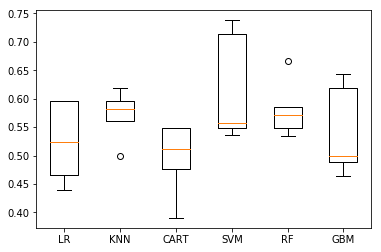

In [10]:
# spot check for ES1
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# load dataset
dataset = read_csv('es1.csv', header=None)
# split into inputs and outputs
values = dataset.values
X, y = values[:, :-1], values[:, -1]
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
    # create a pipeline for the model
    s = StandardScaler()
    p = Pipeline(steps=[('s',s), ('m',models[i])])
    scores = cross_val_score(p, X, y, scoring='accuracy', cv=5, n_jobs=-1)
    all_scores.append(scores)
    # summarize
    m, s = mean(scores)*100, std(scores)*100
    print('%s %.3f%% +/-%.3f' % (names[i], m, s))
# plot
pyplot.boxplot(all_scores, labels=names)
pyplot.show()

k=1 54.922% +/-10.665
k=2 57.247% +/-7.366
k=3 55.240% +/-4.558
k=4 60.037% +/-5.652
k=5 57.133% +/-4.036
k=6 60.547% +/-6.395
k=7 60.047% +/-6.286
k=8 60.058% +/-6.880
k=9 59.604% +/-8.943
k=10 58.618% +/-5.927
k=11 58.606% +/-6.342
k=12 56.679% +/-3.892
k=13 59.536% +/-5.270
k=14 57.666% +/-5.700
k=15 58.130% +/-3.954
k=16 57.655% +/-2.546
k=17 60.036% +/-4.201
k=18 58.131% +/-5.438
k=19 60.988% +/-3.971
k=20 58.595% +/-3.165
k=21 60.976% +/-5.077


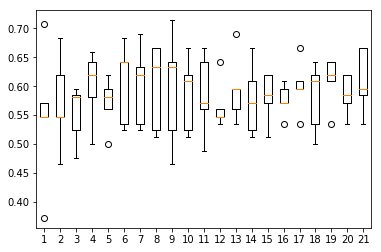

In [12]:
# spot check for ES1
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 
# load dataset
dataset = read_csv('es1.csv', header=None)
# split into inputs and outputs
values = dataset.values
X, y = values[:, :-1], values[:, -1]
# try a range of k values
all_scores, names = list(), list()
for k in range(1,22):
    # evaluate
    scaler = StandardScaler()
    model = KNeighborsClassifier(n_neighbors=k)
    pipeline = Pipeline(steps=[('s',scaler), ('m',model)])
    names.append(str(k))
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
    all_scores.append(scores)
    # summarize
    m, s = mean(scores)*100, std(scores)*100
    print('k=%d %.3f%% +/-%.3f' % (k, m, s))
# plot
pyplot.boxplot(all_scores, labels=names)
pyplot.show()

LR 55.769%
KNN 46.154%
KNN-7 44.231%
CART 49.038%
SVM 50.962%
RF 47.115%
GBM 49.038%


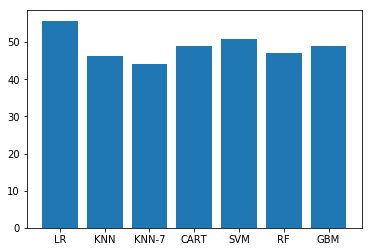

In [13]:
# spot check for ES2
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# load dataset
train = read_csv('es2_train.csv', header=None)
test = read_csv('es2_test.csv', header=None)
# split into inputs and outputs
trainX, trainy = train.values[:, :-1], train.values[:, -1]
testX, testy = test.values[:, :-1], test.values[:, -1]
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
    # create a pipeline for the model
    scaler = StandardScaler()
    model = Pipeline(steps=[('s',scaler), ('m',models[i])])
    # fit
    # model = models[i]
    model.fit(trainX, trainy)
    # predict
    yhat = model.predict(testX)
    # evaluate
    score = accuracy_score(testy, yhat) * 100
    all_scores.append(score)
    # summarize
    print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()